## 네이버 금융
- selenium
- iframe
    - HTML 안에 또 다른 HTML

In [3]:
import pandas as pd
import time
from selenium import webdriver

In [ ]:
# # ※ 웹브라우저를 띄울수 없는 상황의 경우!
# Colab처럼 브라우저를 못 띄울때 사용하는 코드
# options = webdriver.ChromeOptions()
# options.add_argument("headless")
# driver = webdriver.Chrome("driver/chromedriver", optins=options)
# driver.get(url)

In [12]:
url = 'https://finance.naver.com/marketindex/'
driver = webdriver.Chrome('driver/chromedriver_win32 (1)/chromedriver')
driver.get(url)

In [18]:
# 환전 고시 환율
contents = driver.find_elements_by_css_selector("#exchangeList > li > a")
contents[0].text

'1,196.00\n5.50'

In [21]:
contents[0].find_element_by_css_selector('.value').text # exchangelist라는 태그아래 list태그아래 a태그아래
# 그리고 class가(.으로 표현) value인거 원소 하나(element) 찍어보기

'1,196.00'

In [31]:
# 주요 뉴스 탭의 제목도 가져와 보겠음.

news_titles = driver.find_elements_by_css_selector("#content > div.section_news > div > ul > li:nth-child(1) > p > a")
news_titles[0].text

'원자재값 급등 속 국내 제조업 전망 2분기'

In [34]:
# 밑 페이지에 있는 매매 기준율
# 단순히 가지고 싶은 태그 copy해서 selector 로 가져오면 빈 리스트가 뜸 (iframe)이기 때문에 바로 접근 불가!!!
driver.find_elements_by_css_selector('body > div > table > tbody > tr')

[]

## iframe

In [35]:
# selenium을 이용한 방법
# > 가장 많이 쓰이고 간편한 방법( for search i frame)

In [37]:
# iframe 태그 지정

iframe = driver.find_element_by_css_selector("#frame_ex1") # iframe이라는 태그가 붙은 곳을 찾아냄
# driver.find_element_by_id("frame_ex1")

In [38]:
# iframe 태그 이동 ( 환경 옮김. html내부의 html안으로 들어간 느낌 )
# 이제 iframe 내에서 html 문법을 통해 내부 것들 접근 가능!!
driver.switch_to_frame(iframe)

# 경고 문구는 무시해도 됨.

C:\Users\dalwoo\AppData\Local\Temp/ipykernel_16832/630311945.py:2: DeprecationWarning: use driver.switch_to.frame instead
  driver.switch_to_frame(iframe)


In [41]:
# 환전 고시 환율  >>> td.sale을 최종적으로 가져올거임
driver.find_element_by_css_selector(".sale")

<selenium.webdriver.remote.webelement.WebElement (session="0080509b6be318f9c7d4b5e2f6776359", element="6c834073-edd1-4a9c-81cd-969a42169c06")>

In [45]:
# 밑 페이지에 있는 매매 기준율

contents = driver.find_elements_by_css_selector('body > div > table > tbody > tr')
contents[0].find_element_by_css_selector('.sale').text

'1,196.00'

In [52]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [53]:
import openpyxl

datas = []

# 상위 3개만 시험삼아 가져와보겠음. 이름, 가격,
for content in contents[:3]:
    title = content.find_element_by_css_selector('.tit > a').text # class가 tit고 그 밑의 a태그에 담겨있음
    sale = content.find_element_by_css_selector('.sale').text
    link = content.find_element_by_css_selector('.tit > a').get_attribute('href') # 해당 지표를 담고있는 링크
    datas.append({
        'title' : title,
        'sale' : sale,
        'link' : link
    })
df = pd.DataFrame(datas)
df.to_excel('./sel_naver_finance.xlsx', encoding='utf-8') # ./ : 현재 폴더

In [55]:
df

,title,sale,link
0,미국 USD,"1,196.00",https://finance.naver.com/marketindex/exchange...
1,유럽연합 EUR,"1,384.43",https://finance.naver.com/marketindex/exchange...
2,일본 JPY (100엔),"1,064.20",https://finance.naver.com/marketindex/exchange...


In [58]:
driver.quit()

###  request를 이용한 방법 (iframe 사용할때)

In [ ]:
# iframe은 사실 페이지내에서 다른 url 환경이기때문에, 그 데이터는 요청해야될 url링크가 따로 있음 request로

In [62]:
!pip install IPython 

In [63]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

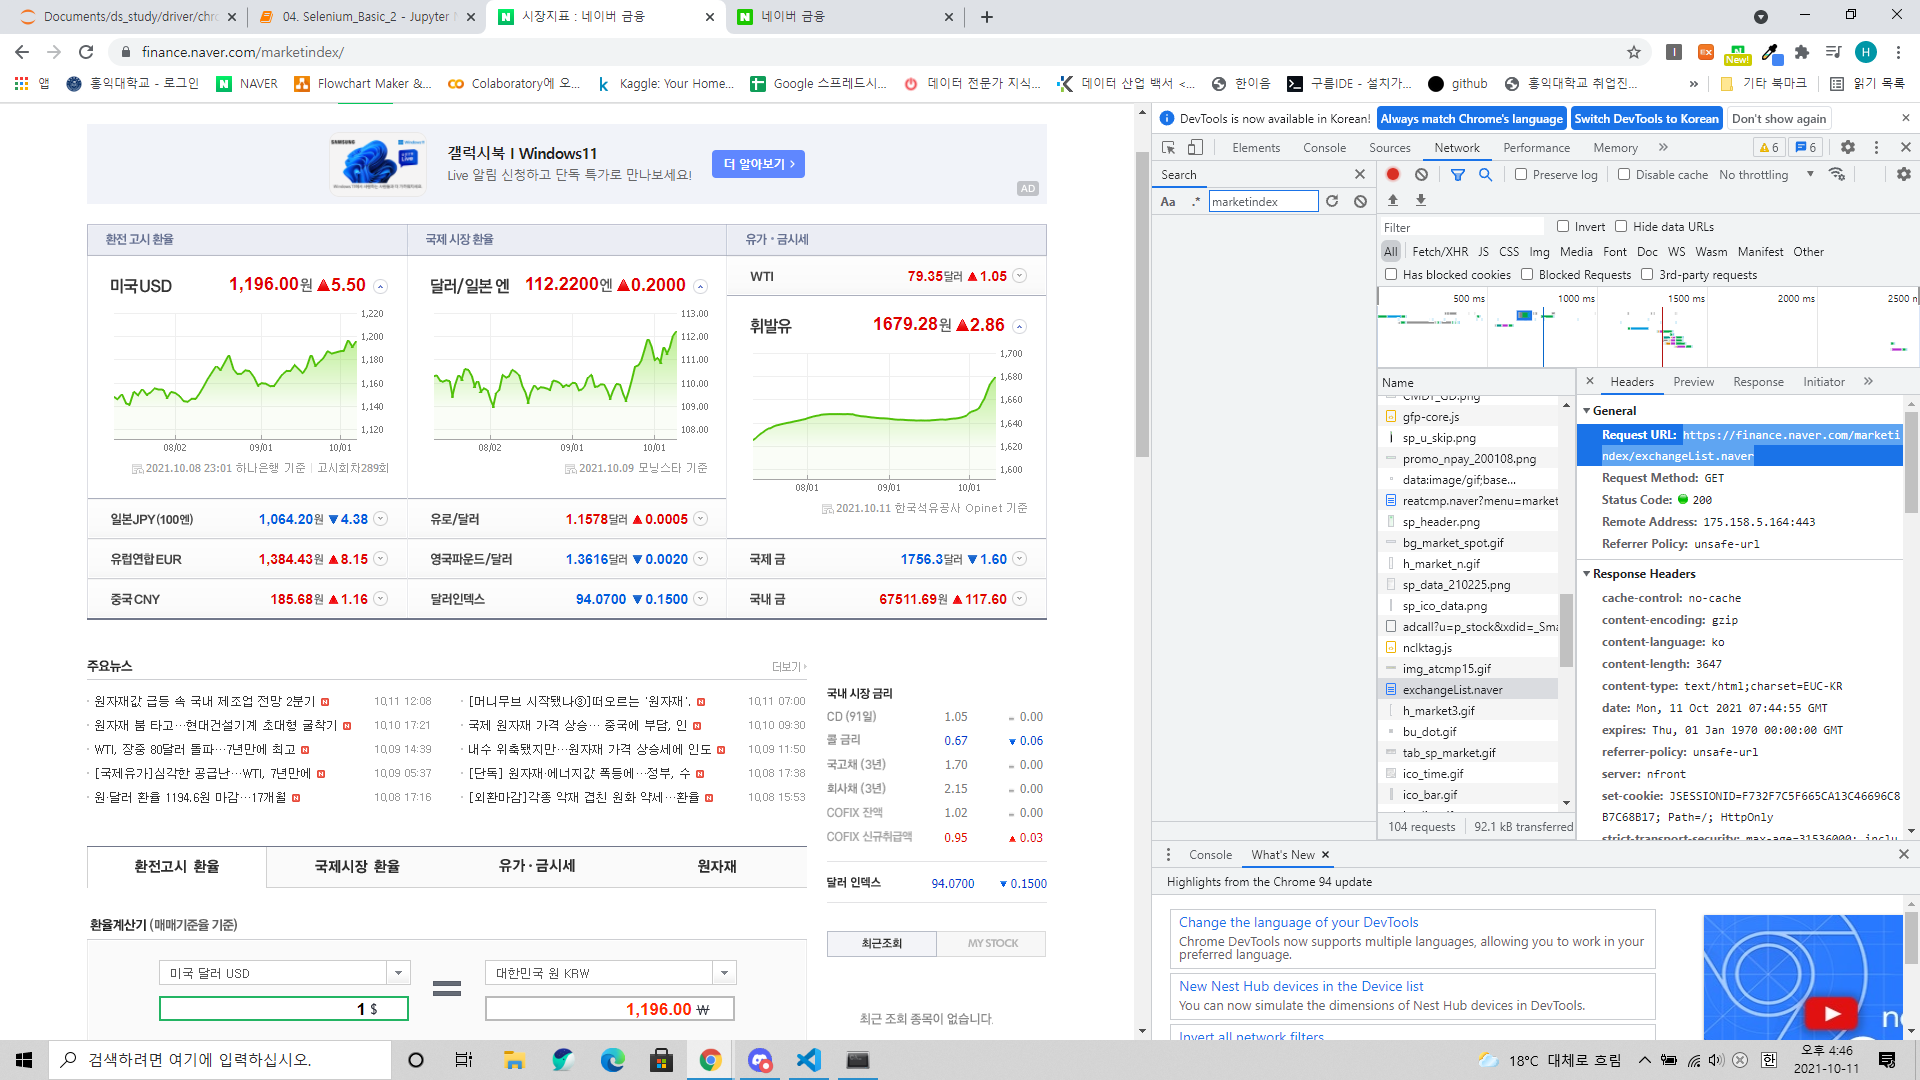

In [66]:
Image("E:/학습/제로베이스/셀레니움/request요청하려는html.png")

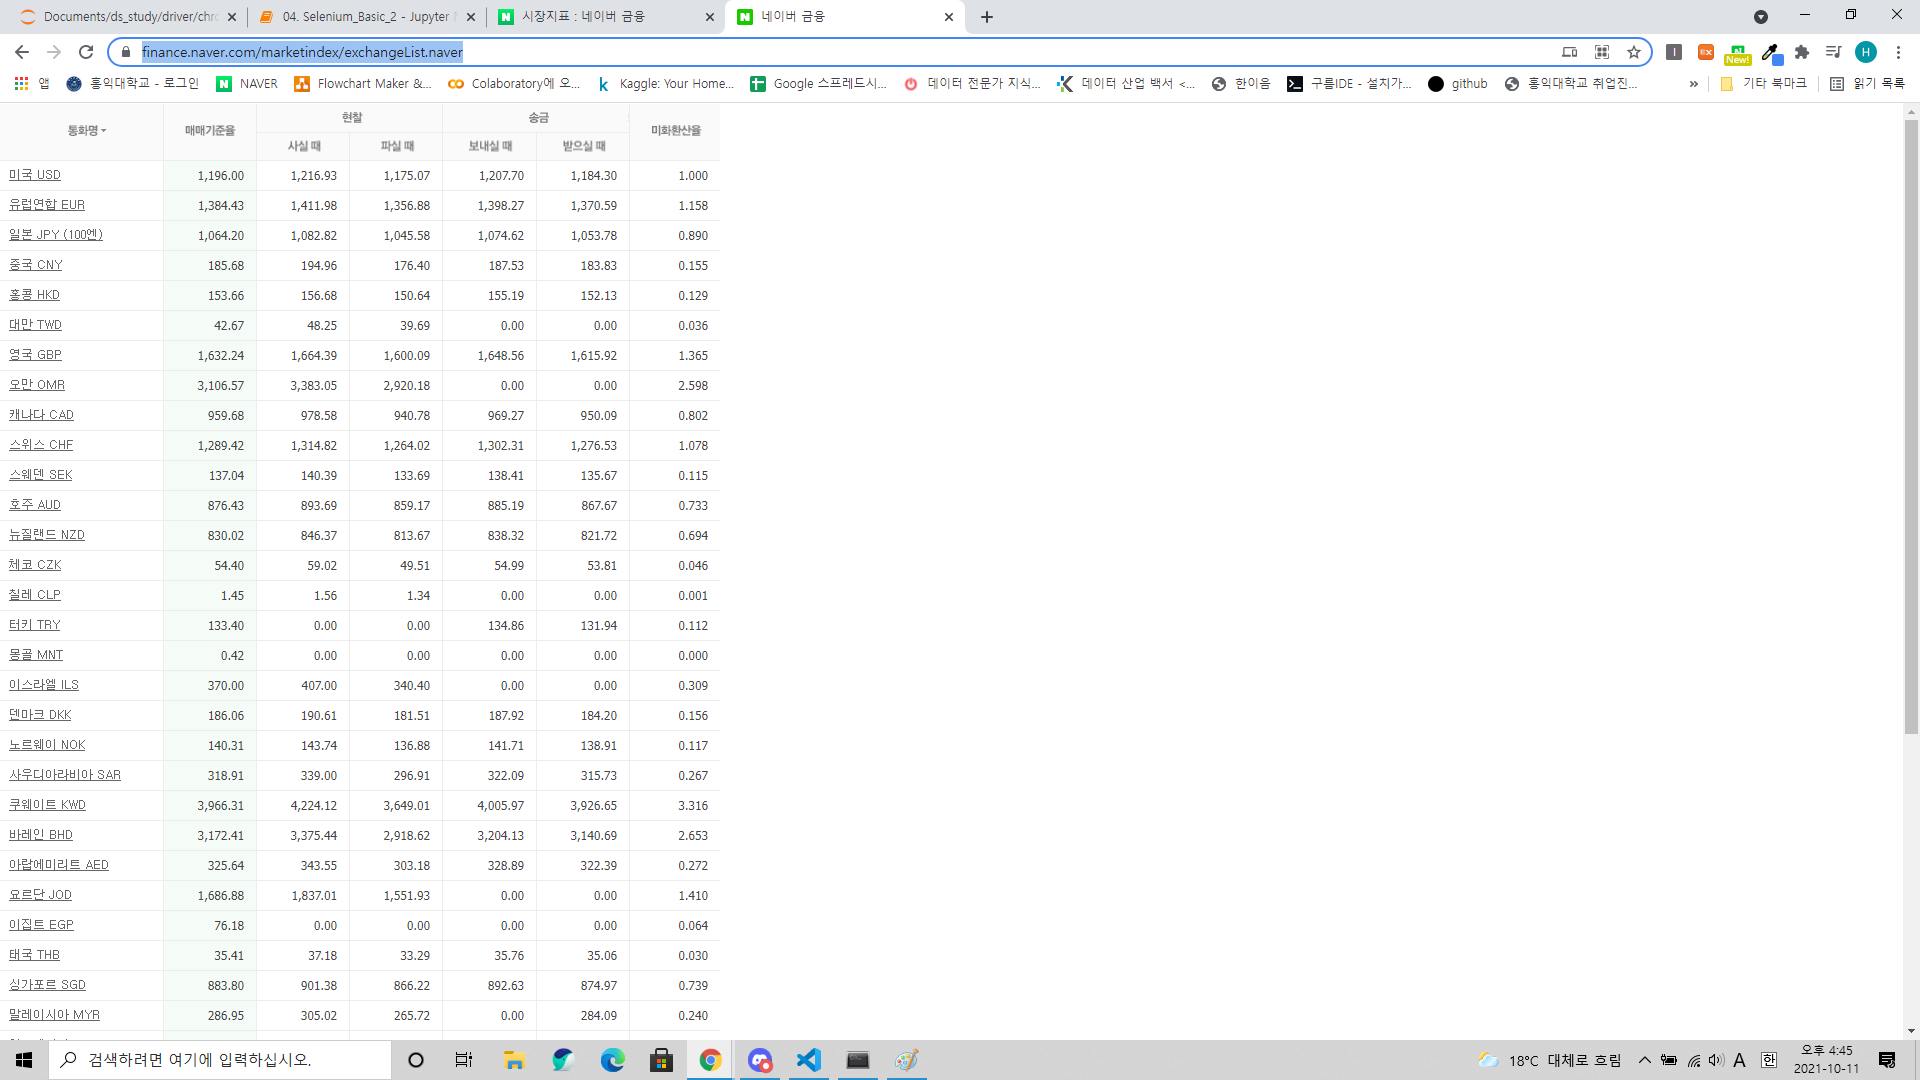

In [67]:
Image("E:/학습/제로베이스/셀레니움/셀레니움_iframe_request.png")

In [70]:
!pip install bs4

In [75]:
import requests
from bs4 import BeautifulSoup as BS

In [73]:
url = 'https://finance.naver.com/marketindex/exchangeList.naver' # 개발자도구, 네트워크, ExchangeList를 확인함으로 알게된 general URL
response = requests.get(url)
response

<Response [200]>

In [74]:
response.content

b'<html lang=\'ko\'>\n<head>\n<title>\xb3\xd7\xc0\xcc\xb9\xf6 \xb1\xdd\xc0\xb6</title>\n<meta http-equiv=\'Content-Type\' content=\'text/html; charset=euc-kr\'>\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20210916165954/css/finance.css">\n\n<script language="javascript">document.domain="naver.com";</script>\n<script type="text/javascript" src="https://ssl.pstatic.net/imgstock/static.pc/20210916165954/js/info/jindo.min.ns.1.5.3.euckr.js"></script>\n<script type="text/javascript" src="https://ssl.pstatic.net/imgstock/static.pc/20210916165954/js/lcslog.js"></script>\n</head>\n<body>\n<div class="tbl_area">\n\t<table border="1" class="tbl_exchange" summary="\xc8\xaf\xc0\xfc \xb0\xed\xbd\xc3 \xc8\xaf\xc0\xb2 \xb8\xae\xbd\xba\xc6\xae">\n\t<caption>\xc8\xaf\xc0\xfc \xb0\xed\xbd\xc3 \xc8\xaf\xc0\xb2</caption>\n\t<colgroup>\n\

In [76]:
soup = BS(response.content, 'html.parser')
print(soup.prettify())

<html lang="ko">
 <head>
  <title>
   네이버 금융
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="text/javascript" http-equiv="Content-Script-Type"/>
  <meta content="text/css" http-equiv="Content-Style-Type"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20210916165954/css/finance.css" rel="stylesheet" type="text/css"/>
  <script language="javascript">
   document.domain="naver.com";
  </script>
  <script src="https://ssl.pstatic.net/imgstock/static.pc/20210916165954/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript">
  </script>
  <script src="https://ssl.pstatic.net/imgstock/static.pc/20210916165954/js/lcslog.js" type="text/javascript">
  </script>
 </head>
 <body>
  <div class="tbl_area">
   <table border="1" class="tbl_exchange" summary="환전 고시 환율 리스트">
    <caption>
     환전 고시 환율
    </caption>
    <colgroup>
     <col width="162"/>
     <col width="92"/>
     <col width="92"/>
     <col width="92"/>
     <col widt

In [77]:
soup.select_one('.sale').text

'1,196.00'

In [84]:
contents = soup.select("tbody > tr") # 부모태그
contents[2].select_one(".sale").text # 일본 환율

'1,064.20'

In [86]:
for content in contents:
    print(content.select_one('.sale').text) # 마지막이 헝가리와 폴란드.

1,196.00
1,384.43
1,064.20
185.68
153.66
42.67
1,632.24
3,106.57
959.68
1,289.42
137.04
876.43
830.02
54.40
1.45
133.40
0.42
370.00
186.06
140.31
318.91
3,966.31
3,172.41
325.64
1,686.88
76.18
35.41
883.80
286.95
8.43
328.42
2.81
883.80
15.92
7.00
13.98
23.62
57.75
217.17
5.26
80.00
16.64
3.84
301.10


In [87]:
driver.get(url)
driver.maximize_window() # NewConnectionError:-> 서버에서 IP밴당함..

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=6169): Max retries exceeded with url: /session/0080509b6be318f9c7d4b5e2f6776359/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000024A533F9C40>: Failed to establish a new connection: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다'))